In [1]:
from utils.imports import *

Using TensorFlow backend.


In [2]:
model_paths = PATH['model_paths']
pred_path = PATH['model_train_pred']
data_path = PATH['model_train']

In [3]:
model_fenge_path=model_paths + 'final_fenge_170629.h5'
model_fenge = load_model(model_fenge_path, custom_objects={'dice_coef_loss': dice_coef_loss, 'dice_coef': dice_coef})

In [17]:
lungs = [x for x in sorted(os.listdir(data_path + 'lung/')) if x != '.DS_Store']
nods = [x for x in sorted(os.listdir(data_path + 'nodule/')) if x != '.DS_Store']
lung_100 = sorted(np.random.choice(lungs,70))

### 模型预测结果与GroundTruth的相似度应越高越好，满值为1
#### -肺部掩模：加在预测前后都明显降低准确率
#### -预测结果门限：0.95，在实际检测中，不加门限的查出的ROI数量更少
#### -开运算：5和3没太大差别，3与不加open稍好0.01%，总0.11%

- 06072;28.292984%
- 06073;28.292829%
- 06082;28.292829%
- 06083;28.292829%

In [18]:
#simule(data_path,model_fenge,lung_100)

In [19]:
mean = 0.0
for scan in tqdm(lung_100):
        patient_id = scan.split('/')[-1][:-4]
        img = cv2.imread(data_path + 'lung/' + scan,cv2.IMREAD_GRAYSCALE)   
        #seg_img, overlap = helpers.get_segmented_lungs(img.copy())
        mask = cv2.imread(data_path + 'nodule/' + scan[:-5] + 'm.png',cv2.IMREAD_GRAYSCALE).astype(int) 
        
        
        #img = skimage.morphology.binary_opening(np.squeeze(img), np.ones([2,2])) 
        img = np.expand_dims(img,0)
        img = np.expand_dims(img,0)   
        p = model_fenge.predict(img)

        p = np.squeeze(p)
        #p[p==1]=int(1)
        #p[p!=1]=int(0)
        #p[p<0.5]=int(0)

        #细节参数调整
        
        #p = p*overlap
        #p = skimage.morphology.closing(np.squeeze(p), np.ones([5,5]))       
        
        mean += dice_coef_np(p,mask)
mean=mean*1.0/len(lung_100)
print(u"分割的相似度是：%.2f"  %(mean))

100%|██████████████████████████████████████████████████████████████████████████████████| 70/70 [00:06<00:00, 10.35it/s]


分割的相似度是：1.60


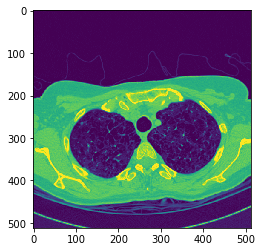

In [20]:
%matplotlib inline
plt.imshow(np.squeeze(img))

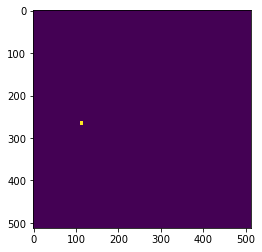

In [21]:
plt.imshow(np.squeeze(mask))

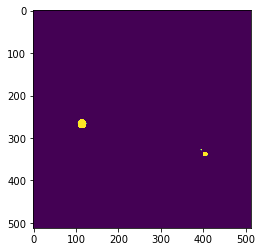

In [22]:
plt.imshow(np.squeeze(p))

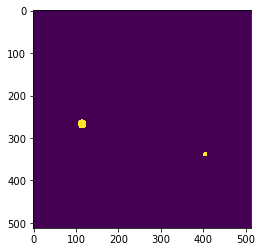

In [27]:
s=p.copy()
#s[s==1]=int(1)
#s[s!=1]=int(0)
s[s<1]=int(0)
s=np.squeeze(s)
s = skimage.morphology.opening(s, np.ones([3,3]))
plt.imshow(s)